<a href="https://colab.research.google.com/github/PGV1000/DeepLearning/blob/main/DeepNN_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_%E2%84%962_%D0%9C%D0%B5%D0%B4%D0%B2%D0%B5%D0%B4%D0%B5%D0%B2_%D0%94_%D0%93_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическое занятие №2. Обучение нейронной сети, используя библиотеку Keras в задачах регрессии и классификации**

# **2. Обучение нейронной сети для классификации изображений, используя свой датасет**

In [31]:
# импортируем бэкенд Agg из matplotlib для сохранения графиков на диск
import matplotlib
matplotlib.use("Agg")

In [30]:
# Подключаем необходимые модули и пакеты
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

In [32]:
%%capture
DATADIR = 'Dataset'
if os.path.isdir(DATADIR)>0:
    print ('Data directory already exists and it is not empty, miss downloading')
else:
    print ('Data directory does not exists or it is empty, download the dataset')
    !gdown --id 1P_ElNNoA_DoK634VCDoEUfFqvKpL_6rK #Скопировать ID из ссылки в гугл диске
    !unzip Car-Bike-Dataset.zip

In [33]:
# инициализируем данные и метки
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [34]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/Dataset")))

random.shuffle(imagePaths)

In [35]:
# цикл по изображениям
for imagePath in imagePaths:

	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (80, 80)).flatten() # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# а затем "выраниваем" его в вектор, состоящий из (32*32*3) 3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

In [36]:
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [37]:
# разбиваем данные на обучающую и тестовую выборки, используя 75%
# данных для обучения и оставшиеся 25% для тестирования
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [38]:
# конвертируем метки из целых чисел в векторы (для 2х классов при
# бинарной классификации вам следует использовать функцию Keras
# "to_categorical" вместо "LabelBinarizer" из scikit-learn, которая не возвращает вектор)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [43]:
# определим архитектуру 3072-1024-512-3 с помощью Keras
model = Sequential()
model.add(Dense(4096, input_shape=(19200,), activation="relu"))
model.add(Dense(2048, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [44]:
# инициализируем скорость обучения и общее число эпох
INIT_LR = 0.01
EPOCHS = 80

In [45]:
# компилируем модель, используя SGD как оптимизатор и категориальную
# кросс-энтропию в качестве функции потерь (для бинарной классификации
# следует использовать binary_crossentropy)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


In [47]:
# обучаем нейросеть
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=EPOCHS, batch_size=2000)

Epoch 1/80
2/2 [==============================] - 1s 515ms/step - loss: 0.5259 - accuracy: 0.7457 - val_loss: 0.5346 - val_accuracy: 0.7300
Epoch 2/80
2/2 [==============================] - 0s 252ms/step - loss: 0.5233 - accuracy: 0.7417 - val_loss: 0.5590 - val_accuracy: 0.6860
Epoch 3/80
2/2 [==============================] - 0s 249ms/step - loss: 0.5542 - accuracy: 0.6930 - val_loss: 0.5892 - val_accuracy: 0.6530
Epoch 4/80
2/2 [==============================] - 1s 317ms/step - loss: 0.5536 - accuracy: 0.6910 - val_loss: 0.5252 - val_accuracy: 0.7450
Epoch 5/80
2/2 [==============================] - 1s 321ms/step - loss: 0.5041 - accuracy: 0.7677 - val_loss: 0.5191 - val_accuracy: 0.7480
Epoch 6/80
2/2 [==============================] - 1s 342ms/step - loss: 0.5054 - accuracy: 0.7647 - val_loss: 0.5557 - val_accuracy: 0.6880
Epoch 7/80
2/2 [==============================] - 1s 333ms/step - loss: 0.5354 - accuracy: 0.7220 - val_loss: 0.5677 - val_accuracy: 0.6780
Epoch 8/80
2/2 [====

In [48]:
# оцениваем нейросеть
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
32/32 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

        Bike       1.00      0.40      0.57      1000
         Car       0.00      0.00      0.00         0

    accuracy                           0.40      1000
   macro avg       0.50      0.20      0.29      1000
weighted avg       1.00      0.40      0.57      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


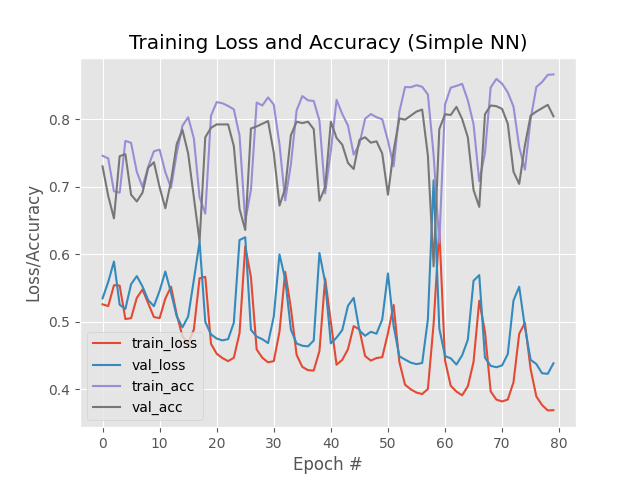

In [49]:
# строим графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
cv2_imshow(cv2.imread("plot.png"))


In [50]:
# сохраняем модель и метки классов в бинарном представлении на диск
print("[INFO] serializing network and label binarizer...")
model.save("model.h5", save_format="h5")
f = open("label_bin", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Проверка обученной модели пользовательскими данными

In [51]:
from keras.models import load_model
import argparse
import pickle
import cv2

Saving Screenshot 2024-02-25 013801.jpg to Screenshot 2024-02-25 013801 (1).jpg


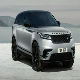

In [77]:
# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files
uploaded = files.upload()

# загружаем входное изображение, меняем его размер на необходимый и выводим его
image = cv2.imread(list(uploaded.keys())[0])
output = image.copy()
image = cv2.resize(image, (80, 80))
cv2_imshow(image)

In [78]:
# "Выравниваем" изображение (преобразуем его в вектор. Из 32х32х3 -> 3072)
image = image.flatten()
# масштабируем значения пикселей к диапазону [0, 1]
image = image.astype("float") / 255.0
image = image.reshape((1, image.shape[0]))

In [79]:
# загружаем модель и бинаризатор меток
from keras import models
print("[INFO] loading network and label binarizer...")
model = models.load_model("model.h5")
lb = pickle.loads(open("label_bin", "rb").read())

[INFO] loading network and label binarizer...


In [80]:
# делаем предсказание на изображении
preds = model.predict(image)
print(preds)

1/1 [==============================] - 0s 57ms/step
[[0.01288715 0.9871128 ]]


In [81]:
# находим индекс метки класса с наибольшей вероятностью
# соответствия
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

In [82]:
# Добавляем на исходное изображение метку класса и вероятность прогноза
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(0, 0, 255), 2)

array([[[182, 186, 180],
        [182, 186, 180],
        [182, 186, 180],
        ...,
        [170, 175, 173],
        [172, 175, 173],
        [172, 175, 173]],

       [[181, 185, 179],
        [181, 185, 179],
        [181, 185, 179],
        ...,
        [170, 175, 173],
        [172, 175, 173],
        [172, 175, 173]],

       [[181, 185, 179],
        [181, 185, 179],
        [181, 185, 179],
        ...,
        [170, 175, 173],
        [172, 175, 173],
        [172, 175, 173]],

       ...,

       [[163, 169, 164],
        [163, 169, 164],
        [163, 169, 164],
        ...,
        [155, 162, 157],
        [156, 163, 158],
        [156, 163, 158]],

       [[164, 170, 165],
        [164, 170, 165],
        [164, 170, 165],
        ...,
        [153, 160, 155],
        [156, 163, 158],
        [156, 163, 158]],

       [[164, 170, 165],
        [164, 170, 165],
        [164, 170, 165],
        ...,
        [151, 158, 153],
        [153, 160, 155],
        [153, 160, 155]]

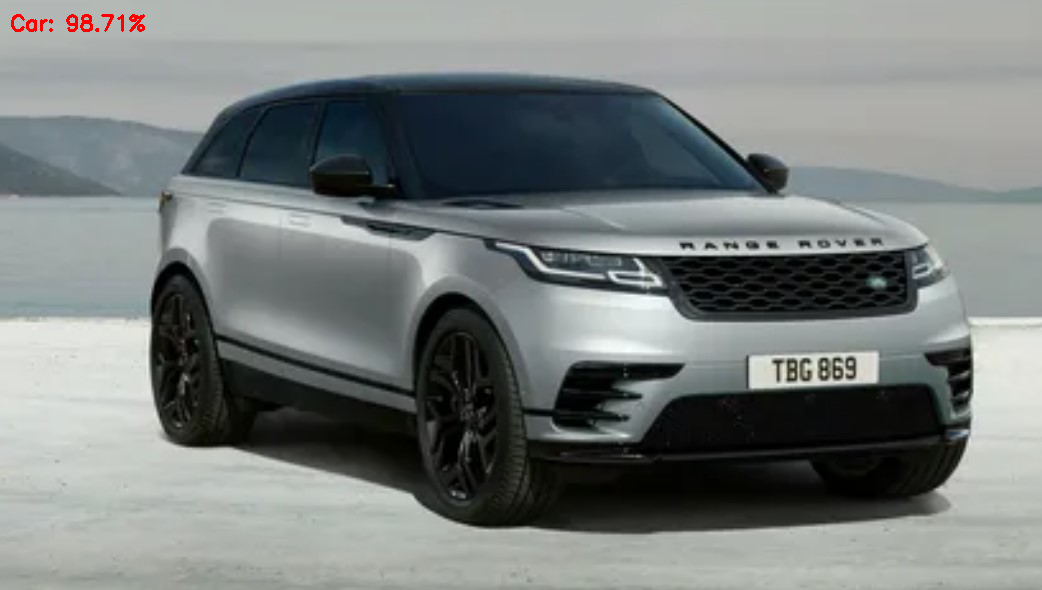

In [83]:
# показываем выходное изображение
cv2_imshow(output)